In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree as sktree
from random import randrange
from csv import reader
import pandas as pd
import numpy as np
import random
import time

In [2]:
def calculateGini(groups, classes):
    temp = []
    for i in groups:
        temp.append(len(i))
    num_instances = float(sum(temp))
    
    giniVal = 0.0
    for i in groups:
        score = 0.0
        size = len(i)
        if(size == 0):
            continue
        else:
            for classVal in classes:
                temp2 = []
                for j in i:
                    temp2.append(j[-1])
                p = temp2.count(classVal)/float(size)
                score += p*p
            giniVal += (1.0 - score)
    return giniVal
                

In [3]:
def getSplit(data, task):
    Y_labels = []
    for i in data:
        Y_labels.append(i[-1])
    Y_labels = list(set(Y_labels))
    indexVal,featureVal, score, group_ = 99999,99999,99999, None
    for i in range(len(data[0]) - 1):
        for j in data:
            left = []
            right = []
            for k in data:
                if(k[i] < j[i]):
                    left.append(k)
                else:
                    right.append(k)
            groups = left, right
            if(task == "cls"):
                ScoreVal = calculateGini(groups, Y_labels)
            else:
                ScoreVal = calculateMSE(groups)
            if (ScoreVal < score):
                indexVal,featureVal, score, group_ = i , j[i], ScoreVal, groups
    return {"index": indexVal, "value": featureVal, "groups": group_ }

In [4]:
def leafNode(group):
    temp4 = []
    for i in group:
        temp4.append(i[-1])
    return max(set(temp4) , key = temp4.count)

In [5]:
def mainSplit(node , max_depth , min_size , depth, task):
    left , right = node['groups']
    if(left == [] or right == []):
        if(task == "cls"):
            node['left'] = node['right'] = leafNode(left + right)
        else:
            node['left'] = node['right'] = leafNodeReg(left + right)
        return
    if (depth >= max_depth):
        if(task == "cls"):
            node['left'], node['right'] = leafNode(left), leafNode(right)
        else:
            node['left'], node['right'] = leafNodeReg(left), leafNodeReg(right)
        return
    if (len(left) <= min_size):
        if(task == "cls"):
            node['left'] = leafNode(left)
        else:
            node['left'] = leafNodeReg(left)
    else:
        node['left'] = getSplit(left,task)
        mainSplit(node['left'], max_depth, min_size, depth+1,task)
    if (len(right) <= min_size):
        if(task == "cls"):
            node['right'] = leafNode(right)
        else:
            node['right'] = leafNodeReg(right)
    else:
        node['right'] = getSplit(right, task)
        mainSplit(node['right'], max_depth, min_size, depth+1, task)
     

In [6]:
def buildTree(train_data, max_depth, min_size, task = "cls"):
    root_node = getSplit(train_data, task)
    mainSplit(root_node , max_depth , min_size , 1, task)
    return root_node

In [7]:
def predictor(node , datapoint):
    if( datapoint[node['index']] < node['value']):
        if(isinstance(node['left'] , dict)):
            return predictor(node['left'], datapoint)
        else:
            return node['left']
    else:
        if(isinstance(node['right'], dict)):
            return predictor(node['right'], datapoint)
        else:
            return node['right']

In [8]:
def decisionTree(train_data, test_data, max_depth, min_size , task = "cls" ):
    
    LearnTime = 0
    predictTime = 0
    learning_start = time.time()
    tree = buildTree(train_data,max_depth,min_size,task)
    learning_end = time.time()
    LearnTime = learning_end - learning_start
    #print_tree(tree)
    predicting_start = time.time()
    predictions = []
    for i in test_data:
        predictions.append(predictor(tree , i))
    predicting_end = time.time()
    predictTime = predicting_end - predicting_start
    return LearnTime , predictTime

In [9]:
def generateData(N,M):
    data = np.random.rand(N,M)
    y_label = []
    for i in range(N):
        y_label.append(random.choice([0,1]))
    data = pd.DataFrame(data)
    data["label"] = pd.Series(y_label)
    return data.values.tolist()

In [10]:
generateData(2,3)

[[0.6779483678269368, 0.7765281480438261, 0.6743638318359165, 0.0],
 [0.28035240408254947, 0.615923627878577, 0.8538673893816595, 0.0]]

# Learning Tree time
### Plot for N keeping M = 4

In [19]:
trainingTimes = []
predictingTimes = []
for i in range(100,500):
    TRAIN_DATA, TEST_DATA = train_test_split(generateData(i,4), test_size=0.3,random_state = 42)
    learn_time , predict_time = decisionTree(TRAIN_DATA,TEST_DATA,5,10)
    trainingTimes.append(learn_time)
    predictingTimes.append(predict_time)

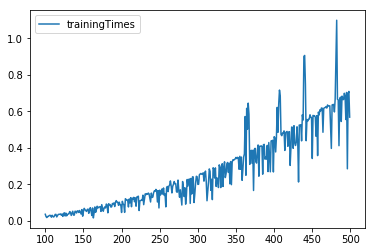

In [20]:
import matplotlib.pyplot as plt
XLabel = range(100,500)
plt.plot(XLabel , trainingTimes)
plt.legend(['trainingTimes'])
plt.show()

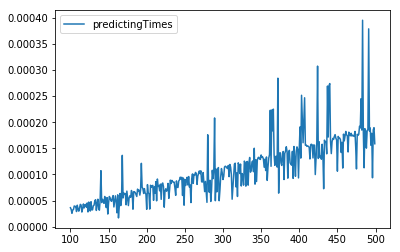

In [21]:
plt.plot(XLabel, predictingTimes)
plt.legend(['predictingTimes'])
plt.show()

## Plot for M keeping N = 150

In [22]:
trainingTimes = []
predictingTimes = []
for i in range(4,20):
    TRAIN_DATA, TEST_DATA = train_test_split(generateData(150,i), test_size=0.3,random_state = 42)
    learn_time , predict_time = decisionTree(TRAIN_DATA,TEST_DATA,5,10)
    trainingTimes.append(learn_time)
    predictingTimes.append(predict_time)

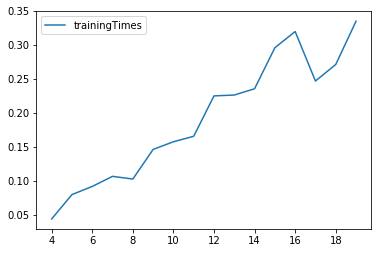

In [23]:
XLabel = range(4,20)
plt.plot(XLabel , trainingTimes)
plt.legend(['trainingTimes'])
plt.show()

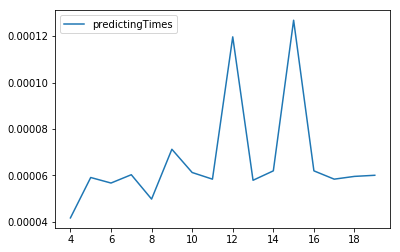

In [24]:
plt.plot(XLabel, predictingTimes)
plt.legend(['predictingTimes'])
plt.show()